# Diabetes Likelihood Prediction

## Dataset Overview

The dataset comprises several features related to individuals' health parameters, specifically aimed at predicting the presence or absence of diabetes based on a binary class variable (0 or 1). The features include:

- Number of times pregnant: The count of pregnancies a person has experienced.
- Plasma glucose concentration: The blood glucose level measured 2 hours after an oral glucose tolerance test, providing insights into the body's ability to handle glucose.
- Diastolic blood pressure: The pressure in the arteries when the heart is at rest, measured in millimeters of mercury (mm Hg).
- Triceps skin fold thickness: The thickness of a fold of skin on the back of the arm, measured in millimeters, which can be an indicator of body fat.
- 2-Hour serum insulin: The insulin level in the blood measured 2 hours after consuming glucose, reflecting the body's insulin response.
- Body mass index (BMI): Calculated as the ratio of weight in kilograms to the square of height in meters, BMI is a measure of body fat and overall health.
- Diabetes pedigree function: A function that scores the likelihood of diabetes based on family history.
- Age: The age of the individual in years.
- Class variable (0 or 1): The target variable indicating the presence (1) or absence (0) of diabetes.

This dataset is valuable for training machine learning models, particularly those using supervised learning techniques, to predict and understand the factors associated with the likelihood of diabetes based on these health-related features.


## Data Preprocessing

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

### Importing Dataset

In [2]:
df = pd.read_csv('diabetes_dataset.csv')
print(df.head(10))

   Number of times pregnant  \
0                         6   
1                         1   
2                         8   
3                         1   
4                         0   
5                         5   
6                         3   
7                        10   
8                         2   
9                         8   

   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
0                                                148                          
1                                                 85                          
2                                                183                          
3                                                 89                          
4                                                137                          
5                                                116                          
6                                                 78                          
7                         

In [4]:
print(df.describe())

       Number of times pregnant  \
count                768.000000   
mean                   3.845052   
std                    3.369578   
min                    0.000000   
25%                    1.000000   
50%                    3.000000   
75%                    6.000000   
max                   17.000000   

       Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
count                                         768.000000                          
mean                                          120.894531                          
std                                            31.972618                          
min                                             0.000000                          
25%                                            99.000000                          
50%                                           117.000000                          
75%                                           140.250000                          
max                 

### Splitting the Data into Training and Test Sets

In [3]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Feature Scaling
- It centers the data around zero and scales it so that it has a standard deviation of 1.
- It’s important to fit the scaler only on X_train, then transform both X_train and X_test, which is exactly what you're doing (to avoid data leakage).

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building the Artificial Neural Network

### Architecture

#### 1. Initialize Sequential layer

- tf.keras.models.Sequential() creates a linear stack of layers. 
- In a Sequential model, each layer has exactly one input tensor and one output tensor, and the layers are arranged in a linear fashion (one after the other).

#### 2. Add a Dense layer number 1 to the model.

- tf.keras.layers.Dense: A fully connected (dense) layer is one where each neuron is connected to every neuron in the previous layer. In this case, it’s the first layer of the network.
- The layer has 8 neurons (or units). The number of units determines the output dimension of the layer. In this case, there are 8 neurons in the first layer.
- We would use the ReLU (Rectified Linear Unit) activation function for this layer. ReLU is a commonly used activation function because it helps with the vanishing gradient problem and makes the model converge faster.
- Mathematically, ReLU is defined as f(x) = max(0, x)
- The line adds the first layer with 8 neurons, using ReLU activation.

#### 3. Add a Dense layer number 2 to the model. 
- add(tf.keras.layers.Dense(units=16, activation='relu'))
- units=16: The layer has 16 neurons (more than the previous one).
- activation='relu'
- This layer increases the depth of the neural network and adds more complexity. With each additional layer and more neurons, the network can model more complex patterns in the data.

This way we add more layers with more units:
- As the network deepens (with more layers and neurons), it becomes more capable of representing complex relationships in the data, but it also requires more computational power and data to train effectively.

#### 4. Finally we add an output layer
- add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
- units=1: This layer has just 1 neuron, which is typical for binary classification problems because we need a single output value to represent the prediction (usually the probability of a particular class).
- activation='sigmoid': The sigmoid activation function is used for the output layer. Sigmoid squashes the output to a value between 0 and 1, which is ideal for binary classification tasks (such as distinguishing between two classes). The output represents the probability of the positive class (usually class 1).
- This function ensures that the output is a probability, which can be interpreted as the likelihood that the input belongs to the positive class.

#### 5. Compile the model 
- compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])

 This line compiles the model, specifying how the model will be trained and evaluated.

- optimizer='adamax': This specifies the Adamax optimizer, which is a variant of the Adam optimizer. Adamax is often used when dealing with sparse gradients and can sometimes perform better in certain tasks. It adapts the learning rate based on the parameters' past gradients and helps with the optimization process, making training faster and more efficient.

- loss='binary_crossentropy': The binary cross-entropy loss function is used here because the task is a binary classification problem (i.e., predicting one of two possible classes). Binary cross-entropy measures the error between the predicted probabilities and the actual labels for binary classification tasks.

- metrics=['accuracy']: The model's performance will be evaluated based on accuracy during training and testing. Accuracy is the proportion of correct predictions to the total number of predictions

In [7]:
model = tf.keras.models.Sequential()                            #type: ignore
model.add(tf.keras.layers.Dense(units=8, activation='relu'))    #type: ignore
model.add(tf.keras.layers.Dense(units=16, activation='relu'))   #type: ignore
model.add(tf.keras.layers.Dense(units=32, activation='relu'))   #type: ignore
model.add(tf.keras.layers.Dense(units=64, activation='relu'))   #type: ignore
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #type: ignore
model.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])

### Training the Neural Network

- The syntax model.fit(X_train, y_train, batch_size=32, epochs=100) is used to train the ANN on the provided training data. This is where the model actually learns from the data by adjusting its parameters (weights and biases) based on the input data (X_train) and the corresponding labels (y_train).
- batch_size=32: Batch size defines the number of training samples that will be used in one forward pass and backward pass before updating the model weights.

In neural network training, we don't update the weights after processing each individual training sample (which would be called stochastic gradient descent, or SGD). Instead, **we update the weights after processing a batch of samples. This is known as mini-batch gradient descent**.

#### Why 32?: 
- A batch size of 32 is a common default value, and it represents the number of samples in one mini-batch. This is a compromise between computational efficiency and model convergence speed.
- Smaller batch sizes (e.g., 1) can lead to noisier gradient estimates, but may allow the model to escape local minima.
- Larger batch sizes (e.g., 128 or 256) provide smoother gradient estimates and faster computation (parallelization), but may lead to a slower convergence in some cases.
- In each iteration, the model will process 32 training samples at a time, calculate the gradient of the loss function, and update the weights accordingly.

#### epochs=100:
Epochs define the number of complete passes through the entire training dataset during training.

For example, if you have 1,000 training samples and a batch size of 250, you would have 1000 / 250 = 4 mini-batches in one epoch. After one epoch, the model has seen each of the 1,000 samples once.

If you set epochs=100, the model will train for 100 full passes over the training data, and the model parameters will be updated 100 times.

Why 100 epochs?: The number of epochs determines how long the training process will run. The choice of 100 epochs is arbitrary in this case, and typically depends on:

1. The complexity of the data (more complex data may require more epochs to learn well).
2. The size of the data (larger datasets may require more epochs).
3. The rate at which the model converges during training (some models may converge in fewer epochs).

- You can stop earlier if the model starts to overfit or if you reach a satisfactory level of performance. You read this via metrics

### How the Training Process Works (fit() method):
```
1. Initialization: The model starts with random weights.
2. Forward Pass: The model takes an input batch (32 samples in this case) from X_train, applies the layers (weights and activation functions), and computes the predicted outputs.
3. Loss Calculation: For each batch, the model computes the loss by comparing the predicted outputs with the true values (y_train) using the loss function (which was specified during model compilation).
4. Backward Pass (Backpropagation): After the loss is calculated, backpropagation is used to compute the gradients of the loss with respect to the model's weights. These gradients indicate how much each weight needs to change to reduce the loss.
5. Weight Update: The weights are updated using an optimizer (like Adamax in your case). The optimizer adjusts the weights based on the gradients calculated during the backward pass.
6. Repeat for each mini-batch:

This process is repeated for all mini-batches in the dataset, and once all mini-batches are processed, it completes one epoch.

7. Repetition for multiple epochs: This process repeats for the number of epochs specified (100 in this case), during which the model's weights continue to adjust and improve in an effort to minimize the loss.
```

In [8]:
# Took 15 secs
model.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4664 - loss: 0.6980
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6248 - loss: 0.6674 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6461 - loss: 0.6418 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6653 - loss: 0.6182 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6454 - loss: 0.6070 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6679 - loss: 0.6074 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7050 - loss: 0.5829 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7234 - loss: 0.5540 
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7299 - loss: 0.5669 
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7526 - loss: 0.5469 
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7497 - loss: 0.5470 
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

## Evaluating the Model

### Predicting Test Set Results

In [9]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step 
[[0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [

### Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(cm)
accuracy_score(y_true=y_test, y_pred=y_pred)

[[85 14]
 [21 34]]


0.7727272727272727

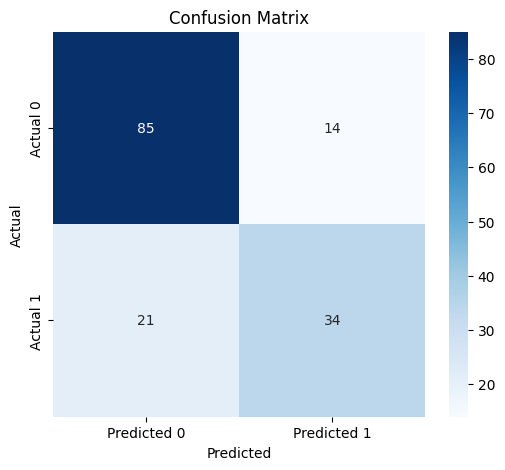

Accuracy: 0.7727


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate and print accuracy
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy: {accuracy:.4f}")


Confusion Matrix (in percentages):
[[85.85858586 14.14141414]
 [38.18181818 61.81818182]]


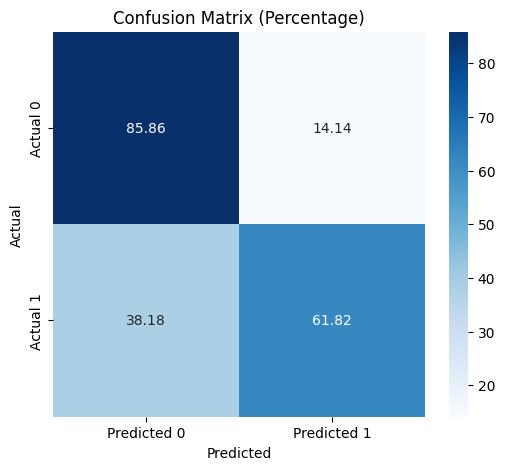

Accuracy: 0.7727


In [13]:
### Lets replot the above Heat Map of confusion matrix with percentage and not actual numbers  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score


# Normalize the confusion matrix to display percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Print the confusion matrix as percentages
print("Confusion Matrix (in percentages):")
print(cm_percentage)

# Display the confusion matrix as a heatmap with percentages
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Percentage)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate and print accuracy
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"Accuracy: {accuracy:.4f}")


In [15]:
# Lets save the model
model_name = 'ANN_diabetes_classify.keras'
model.save(model_name)  # Compact and portable format


# from tensorflow import keras

# # Load full model
# loaded_model = keras.models.load_model(model_name)